In [ ]:
import numpy as np
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = np.column_stack((fish_length, fish_weight))            ##column_stack은 전달받은 리스트를 일렬로 세운 다음 차례로 나란히 연결함
fish_target = np.concatenate((np.ones(35), np.zeros(14)))          ##1이 35개이고 0이 14개인 배열

print(fish_data[:5])

In [4]:
from sklearn.model_selection import train_test_split

##train_test_split() 함수는 전달되는 리스트나 배열을 비율에 맞게 훈현 세트와 테스트 세트로 나누어줌

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state = 42)

## 위의 경우 총 4개의 배열이 반환됨

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)
print(test_target)

(36, 2) (13, 2)
(36,) (13,)
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


[0.]


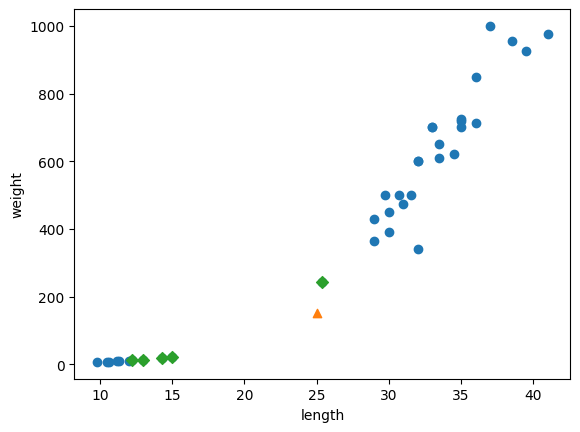

[[1. 0. 0. 0. 0.]]


In [7]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

print(kn.predict([[25,150]]))

distances, indexes = kn.kneighbors([[25,150]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')    ##marker 매개변수를 삼각형으로 지정
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')   ##삼각형에 가장 가까운 5개를 마름모로 그림

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(train_target[indexes])

#기준을 맞춰라

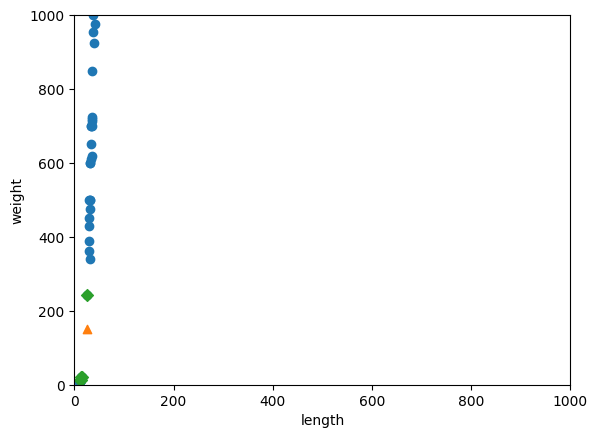

In [8]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0,1000))
plt.ylim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


x와y 좌표를 0부터 1000까지로 지정했을 때, x축은 가장 가까운 이웃을 찾는 데에 전혀 고려되지 않음

###넘파이에서 제공하는 함수를 이용해 평균과 표준편차 계산


In [10]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
train_scaled = (train_input - mean)/std
##(원본 데이터 / 평균값)/표준편차 = 표준점수

np.mean 함수는 평균을 계산  
np.std 함수는 표준편차를 계산  
특성마다 값의 스케일이 다르므로 각 특성별로 계산해야 한다. 따라서 axis = 0 으로 지정하여 값을 계산함  
***넘파이 배열에서만 가능한 계산방식***

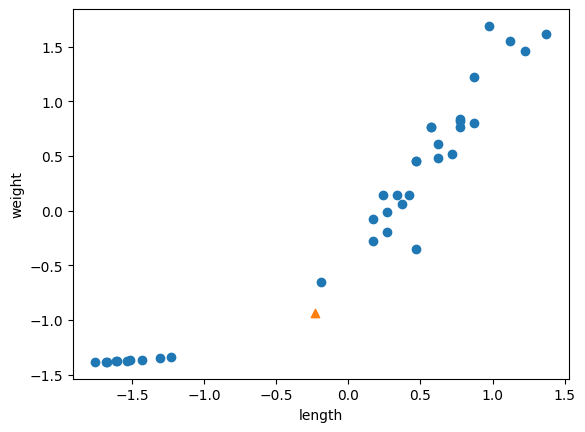

In [11]:
new = ([25,150]-mean)/std    ##샘플을 표준점수로 변환하기

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

표준점수를 사용하여 0을 기준으로 데이터가 고르게 분포되어있음을 확인할 수 있음

[1.]


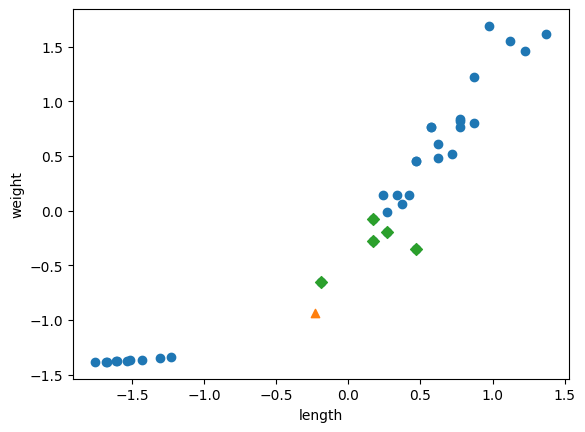

In [13]:
kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean)/std
kn.score(test_scaled, test_target)

print(kn.predict([new]))

distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

kn은